In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('parkinsons.csv')
y=df['status']
df=df.drop(['name','status'],axis=1)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
df.shape

(195, 22)

In [46]:
test_acc = []

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)


In [48]:
for i in range(2,22):
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    # spliting data in train and test dataset 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_pca , y, test_size = 0.2, random_state=50)

    # training dataset
    from sklearn.linear_model import LogisticRegression
    Log_Reg =LogisticRegression(max_iter=5000).fit(X_train,y_train)

    #print("Training  score: ",Log_Reg.score(X_train, y_train))
    #print("Test  score: ",Log_Reg.score(X_test, y_test))

    from sklearn.metrics import classification_report,confusion_matrix
    prediction=Log_Reg.predict(X_test)
    #print(classification_report(y_test,prediction))


    # Create an array (so it is easier to calculate the accuracy)
    
    cm_df=confusion_matrix(y_test,prediction)
    cm = np.array(cm_df)
    Predict_accu = (cm[0,0]+cm[1,1])/cm.sum()
    
    print(Predict_accu)
    test_acc.append(Predict_accu)

0.7948717948717948
0.7948717948717948
0.7692307692307693
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8205128205128205
0.8461538461538461
0.8461538461538461
0.8461538461538461
0.8461538461538461


No handles with labels found to put in legend.


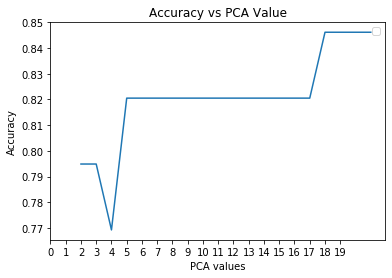

In [54]:
Y = [i for i in range(2,22)]
plt.plot(Y,test_acc)
plt.xlabel("PCA values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs PCA Value")
plt.xticks(np.arange(0,len(Y),1))
plt.legend()
plt.show()

# Now chossing PCA value as 5 or 18 depends on the Computational cost or Accuracy required parameter

## If computational cost is a imp factor than 5 should be selected
## If Accuracy is more important than 18 should be selected